
::: {.callout-note title='Progress'}
<!-- `r stfun::progress(215, 215)` -->
Learning Progress: Completed.🥇

读后感：[读《Python 神经网络编程》](https://shitao5.org/posts/sjwlbc/)。
:::

::: {.callout-tip title="Learning Source"}
- <https://book.douban.com/subject/30192800/>
:::

# 神经网络如何工作

- 更多有趣的问题是没有一个简单的数学公式将输出和输入关联起来的。这就是我们需要诸如神经网络这样相对成熟而复杂的方法的原因。

- 我们并未像在学校里求解数学和科学问题时所做的一样一步到位，精确求解问题。相反，我们尝试得到一个答案，并多次改进答案，这是一种非常不同的方法。一些人将这种方法称为迭代，意思是持续地、一点一点地改进答案。

- 在机器学习中，这是一个重要的思路。我们应该进行适度改进（moderate）。也就是说，我们不要使改进过于激烈。我们采用 $\Delta A$ 几分之一的一个变化值，而不是采用整个 $\Delta A$，充满激情地跳跃到每一个新的 $A$ 值。这种自我节制的调整，还带来了一个非常强大、行之有效的“副作用”。当训练数据本身不能确信为完全正确并且包含在现实世界测量中普遍出现的错误或噪声这两种情况时，有节制的调整可以抑制这些错误或噪声的影响。这种方法是的错误或噪声得到了调解和缓和。

# 使用 Python 进行 DIY

- <p>优秀的程序员、计算机科学家和数学家，只要可能，都尽力创建一般代码，而不是具体的代码。这是一种好习惯，它迫使我们以一种更深更广泛的使用方式思考求解问题。</p>

使用 MNIST 尝试构建神经网络。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
%matplotlib inline

In [2]:
training_data_file = open("mnist_dataset/mnist_train_100.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

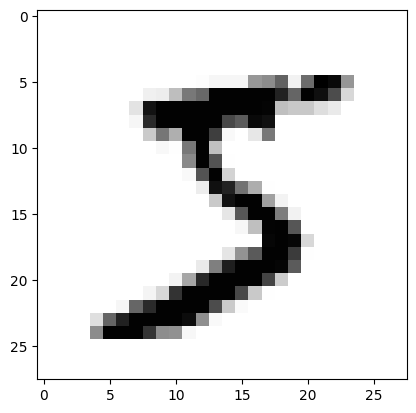

In [3]:
all_values = training_data_list[0].split(",")
image_array = np.asfarray(all_values[1:]).reshape((28, 28))
plt.imshow(image_array, cmap="Greys", interpolation="none")

需要做的第一件事情是将输入颜色值从较大的 0 到 255 的范围，缩放至较小的 0.01 到 1.0 的范围。我们刻意选择 0.01 作为范围最低点，是为了避免先前观察到的 0 值输入最终会认为地造成权重更新失败。我们没有选择 0.99 作为输入的上限值，是因为不需要避免输入 1.0 会造成这个问题。我们只需要避免输出值为 1.0：

In [4]:
scaled_input = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

创建并训练神经网络：

In [5]:
#| code-fold: true
class neuralNetwork:
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input. hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # weights inside the arrays are w_i_j, where links is from node i to node j in the next layer
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        
        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signal emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)),
                                     np.transpose(hidden_outputs))
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),
                                     np.transpose(inputs))
        
    # query the neural network
    def query(self, inputs_list):
        inputs = np.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [6]:
input_nodes = 28 * 28
hidden_nodes = 200
output_nodes = 10
learning_rate = 0.1

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [7]:
# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs): 
    # go through all records in the training data set
    for record in training_data_list:
        all_values = record.split(",")
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = np.zeros(output_nodes) + 0.01
        
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)

In [8]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_dataset/mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [9]:
# test the neual network
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    all_values = record.split(",")
    correct_label = int(all_values[0])
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = np.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)

In [10]:
# calculate the performance score, the fraction of correct answers
scorecard_array = np.asfarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.6


# 趣味盎然

- 人类大脑在遭受损害后，其能力依然能够得到良好发挥，科学家对此深感震惊。这暗示着，神经网络将它们所学到的知识分布在几条链接权重上，也就是说，如果若干链接权重遭受了一定损害，神经网络也可以表现得相当好。这同时意味着，如果输入图像被损坏或不完整，神经网络也可以表现得相当好。

- 虽然黑盒子（神经网络）已经学会如何求解问题，但是，其所学到的知识常常不能转化为对问题的理解和智慧。